<a href="https://colab.research.google.com/github/dvtran63/ai-learning-notebooks/blob/main/day7c_full_model_eval_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Day 7 Bonus: Model Evaluation & Feature Importance

This notebook compares precision, recall, F1 score, and ROC curves for Decision Tree, Logistic Regression, and KNN.
It also explores feature importance for Decision Tree and Logistic Regression.

## 🔁 Reuse Preprocessed Titanic Dataset

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = sns.load_dataset("titanic")
df = df.dropna(subset=["age", "embarked", "fare", "sex"])

df.loc[:,"sex"] = df["sex"].map({"male": 0, "female": 1})
df.loc[:,"embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})

features = ["pclass", "sex", "age", "fare", "embarked"]
X = df[features]
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ⚙️ Train 3 Models: Decision Tree, Logistic Regression, KNN

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)

tree.fit(X_train, y_train)
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_pred_log = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)

y_prob_tree = tree.predict_proba(X_test)[:, 1]
y_prob_log = logreg.predict_proba(X_test)[:, 1]
y_prob_knn = knn.predict_proba(X_test)[:, 1]

## 📈 Classification Reports

In [3]:
from sklearn.metrics import classification_report

print("📊 Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("📊 Decision Tree:")
print(classification_report(y_test, y_pred_tree))

print("📊 KNN:")
print(classification_report(y_test, y_pred_knn))

📊 Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143

📊 Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75        80
           1       0.68      0.67      0.67        63

    accuracy                           0.71       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.71      0.71      0.71       143

📊 KNN:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        80
           1       0.83      0.63      0.72        63

    accuracy                           0.78       143
   macro avg       0.80      0.77      0.77       143
weighted avg       0.79    

## 📉 ROC Curves and AUC

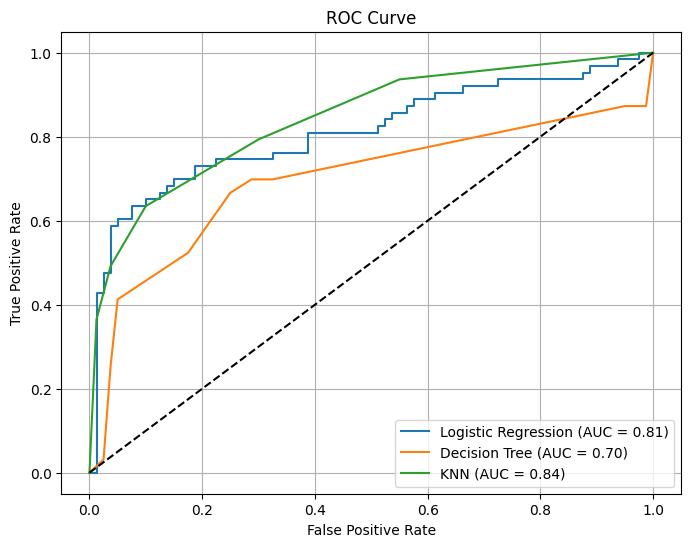

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_tree):.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_score(y_test, y_prob_knn):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## 🧠 Feature Importance: Decision Tree

pclass: 0.2303
sex: 0.5593
age: 0.1136
fare: 0.0968
embarked: 0.0000


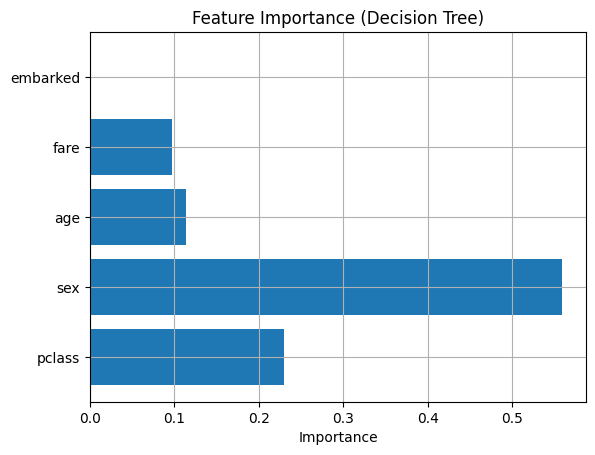

In [5]:
import numpy as np

importances = tree.feature_importances_
for name, importance in zip(features, importances):
    print(f"{name}: {importance:.4f}")

plt.barh(features, importances)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.grid(True)
plt.show()

## 📊 Feature Coefficients: Logistic Regression

pclass: -1.1562
sex: 1.2565
age: -0.4359
fare: -0.1251
embarked: 0.0587


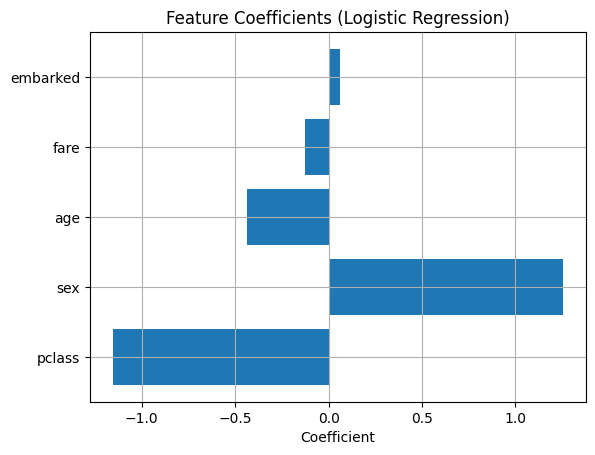

In [6]:
coefficients = logreg.coef_[0]
for name, coef in zip(features, coefficients):
    print(f"{name}: {coef:.4f}")

plt.barh(features, coefficients)
plt.title("Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient")
plt.grid(True)
plt.show()

## 🧮 Confusion Matrices

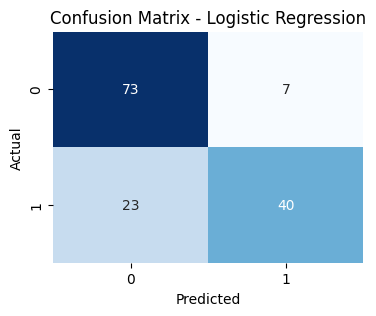

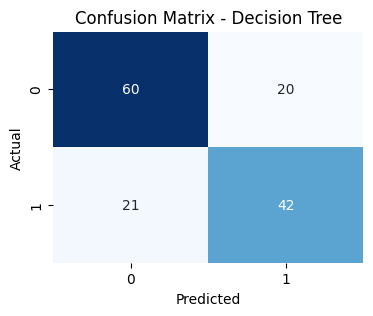

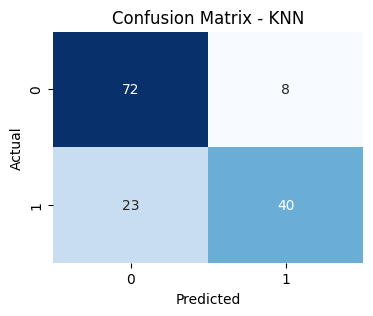

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "KNN": y_pred_knn
}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## 📉 Precision-Recall Curves

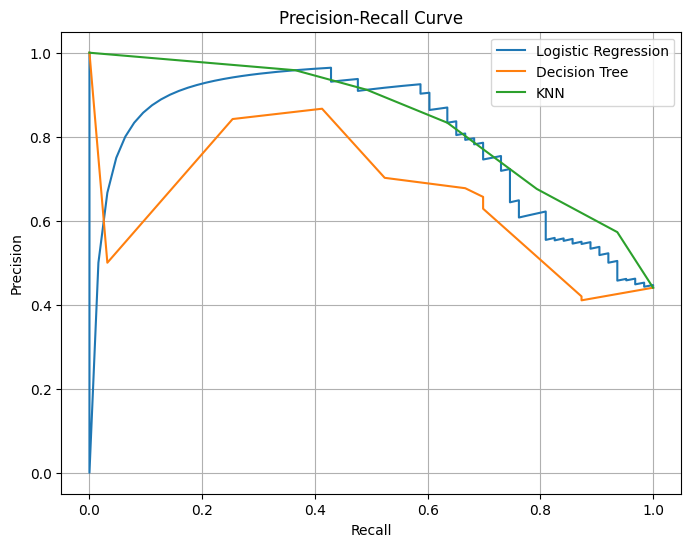

In [8]:
from sklearn.metrics import precision_recall_curve

prec_log, rec_log, _ = precision_recall_curve(y_test, y_prob_log)
prec_tree, rec_tree, _ = precision_recall_curve(y_test, y_prob_tree)
prec_knn, rec_knn, _ = precision_recall_curve(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(rec_log, prec_log, label="Logistic Regression")
plt.plot(rec_tree, prec_tree, label="Decision Tree")
plt.plot(rec_knn, prec_knn, label="KNN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()